In [1]:
import numpy as np
import matplotlib.pyplot as plt

from model import Interval, Model

In [2]:
"""
Contexte : On cherche à résoudre un problème de surface minimale en utilisant une méthode des éléments finis.
Auteur : Guillaume FOUCAUD M1-MACS
Date : 25/04/2024
"""

'\nContexte : On cherche à résoudre un problème de surface minimale en utilisant une méthode des éléments finis.\nAuteur : Guillaume FOUCAUD M1-MACS\nDate : 25/04/2024\n'

In [3]:
I = Interval(2, 3)

model = Model(3, I).setMesh()

model.mesh, model.innerMesh, model.thickness


(array([2.  , 2.25, 2.5 , 2.75, 3.  ]), array([2.25, 2.5 , 2.75]), 0.25)

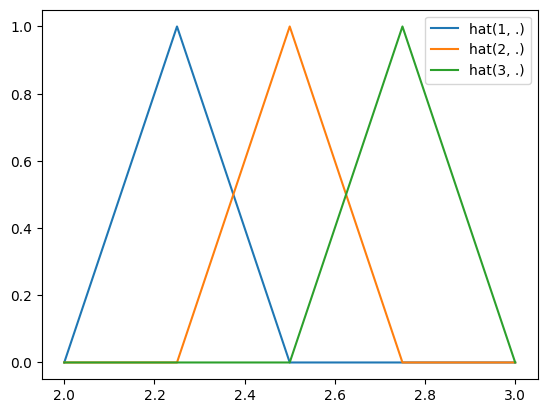

In [4]:
N = model.nums_step + 1

X = model.mesh

for i in range(1, N):
    hat = model.hat(i, X)
    plt.plot(X, hat, label = f"hat({i}, .)")

plt.legend()
plt.show()

[[ 8. -4.  0.  0.  0.  0.  0.]
 [-4.  8. -4.  0.  0.  0.  0.]
 [ 0. -4.  8. -4.  0.  0.  0.]
 [ 0.  0. -4.  8. -4.  0.  0.]
 [ 0.  0.  0. -4.  8. -4.  0.]
 [ 0.  0.  0.  0. -4.  8. -4.]
 [ 0.  0.  0.  0.  0. -4.  8.]]
[-0.16530211 -0.16530211 -0.16530211 -0.16530211 -0.16530211 -0.16530211
 -0.16530211]


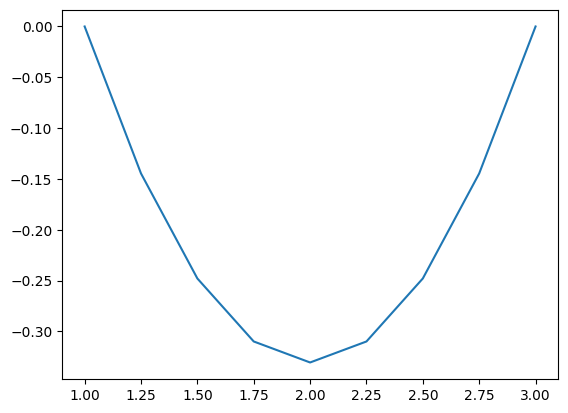

In [5]:
N = 7

alpha = 0
beta = np.arccosh(3)


model = Model(N, Interval(1, 3)).setMesh()

u0 = model.getInitialFunction(alpha, beta)

A = model.getRigidityMatrix()
b = model.getRighHandSide( u0 )

uapp = model.getGradient( u0 )

print(A)
print(b)

X = model.mesh
plt.plot(X, uapp)
plt.show()


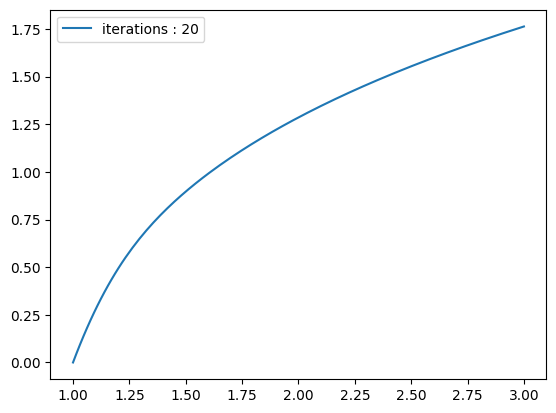

In [6]:
N = 128

model = Model(N, Interval(1, 3)).setMesh()

u0 = model.getInitialFunction(alpha, beta)

u, iterations = model.gradientMethod(u0, max_iter = 20)

plt.plot(model.mesh, u, label=f"iterations : {iterations}")
plt.legend()
plt.show()

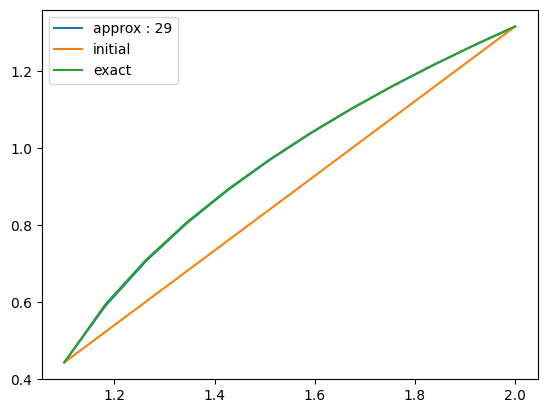

In [7]:
a = 1.1
b = 2

alpha = np.arccosh(a)
beta = np.arccosh(b)

# def
model = Model(
    10,
    Interval(a, b)
).setMesh().setExact(np.arccosh)

# data
mesh = model.mesh

# plot

u0 = model.getInitialFunction(alpha, beta)
uapp, iterations = model.gradientMethod(u0, max_iter = 2000, tolerance = 1e-3)

plt.plot(mesh, uapp, label = f"approx : {iterations}")
plt.plot(mesh, u0, label = "initial")


if model.exact:
    uexa = model.exact(mesh)
    plt.plot(mesh, uexa, label = "exact")


# show

plt.legend()
plt.show()




In [8]:
errL1 = model.normLebesgue1(uapp - uexa)
errLmax = model.normLebesgueInf(uapp - uexa)
errL1test = np.linalg.norm(uapp - uexa, 1)
errW11 = model.normSobolev11(uapp - uexa)

print(f"Erreur L1               {errL1}")
print(f"Erreur Linf             {errLmax}")
print(f"Erreur 1 np.linalg      {errL1test}")
print(f"Erreur W11              {errW11}")



Erreur L1               0.017927692642088242
Erreur Linf             0.00400713909051309
Erreur 1 np.linalg      0.016134923377879418
Erreur W11              0.03961896140010454


In [9]:
a = 1.1
b = 2

alpha = np.arccosh(a)
beta = np.arccosh(b)

# def
model = Model(
    100,
    Interval(a, b)
).setMesh().setExact(np.arccosh)



N_params = [16, 32, 64, 128, 256, 512]
errsL1 = []
errsW11 = []

errsLmax = []

for N in N_params:
    
    model.update(N)

    mesh = model.mesh

    u0 = model.getInitialFunction(alpha, beta)
    uapp, iterations = model.gradientMethod(u0, max_iter = 10000, tolerance = 1e-8)
    
    if not model.exact:
        print("Vous devez définir une fonction exacte pour le modèle avec .setExact(function: callable)")
        break

    uexa = model.exact(mesh)

    #plt.plot(mesh, uapp, label = f"approx : {iterations}")
    #plt.plot(mesh, uexa, label = "exact")
    #plt.plot(mesh, u0, label = "initial")
    #plt.legend()
    #plt.title(f"pas {N}")
    #plt.show()

    errL1 = model.normLebesgue1(uapp - uexa)
    errW11 = model.normSobolev11(uapp - uexa)

    errLmax = model.normLebesgueInf(uapp - uexa)

    #print(f"Erreur L1:  {errL1}")
    #print(f"Erreur W11:  {errW11}")

    errsL1.append(errL1)
    errsW11.append(errW11)
    errsLmax.append(errLmax)

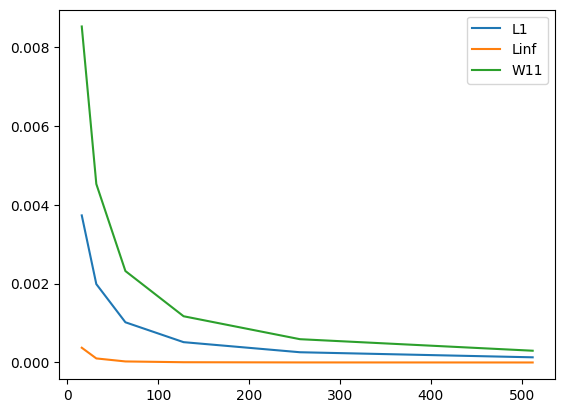

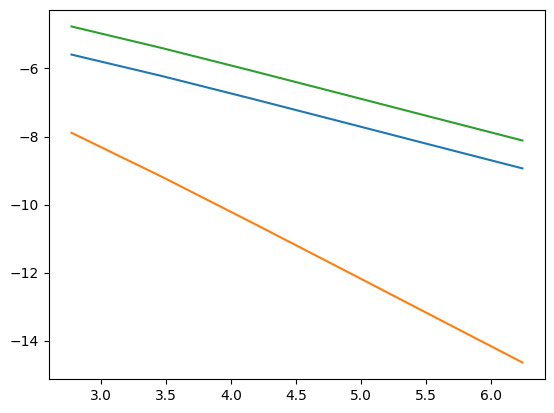

pente de l'erreur L1:   -0.9835232968717935
pente de l'erreur Lmax:   -1.9800623093556229
pente de l'erreur W11:   -0.9845763274429925


In [10]:
plt.plot(N_params, errsL1, label = "L1")
plt.plot(N_params, errsLmax, label = "Linf")
plt.plot(N_params, errsW11, label = "W11")
plt.legend()
plt.show()

N_params_log = np.log(N_params)
errsL1_log = np.log(errsL1)
errsLmax_log = np.log(errsLmax)
errsW11_log = np.log(errsW11)

plt.plot(N_params_log, errsL1_log)
plt.plot(N_params_log, errsLmax_log)
plt.plot(N_params_log, errsW11_log)
plt.show()

slope_L1 = (errsL1_log[-1] - errsL1_log[-2]) / (N_params_log[-1] - N_params_log[-2])
slope_Lmax = (errsLmax_log[-1] - errsLmax_log[-2]) / (N_params_log[-1] - N_params_log[-2])
slope_W11 = (errsW11_log[-1] - errsW11_log[-2]) / (N_params_log[-1] - N_params_log[-2])

print(f"pente de l'erreur L1:   {slope_L1}")
print(f"pente de l'erreur Lmax:   {slope_Lmax}")
print(f"pente de l'erreur W11:   {slope_W11}")

In [11]:
from model import Problem

problem = Problem(np.arccosh, Interval(1.1, 2), max_iter = 2000, tolerance = 1e-7)


#problem.plotApprox(20)
#problem.plotErrors()

Problem.lerp(0, 3, 0.5)
Problem.interpolate(0, 3, Interval(1, 3), 1)

problem.model.update(precision = 50)
u = problem.getInterpolatedFunction()


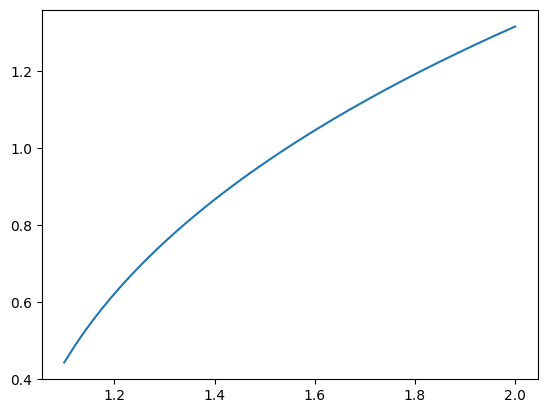

In [12]:
a = problem.interval.min
b = problem.interval.max

x = np.linspace(a, b, 1024)
y = u(x)

plt.plot(x, y)
plt.show()

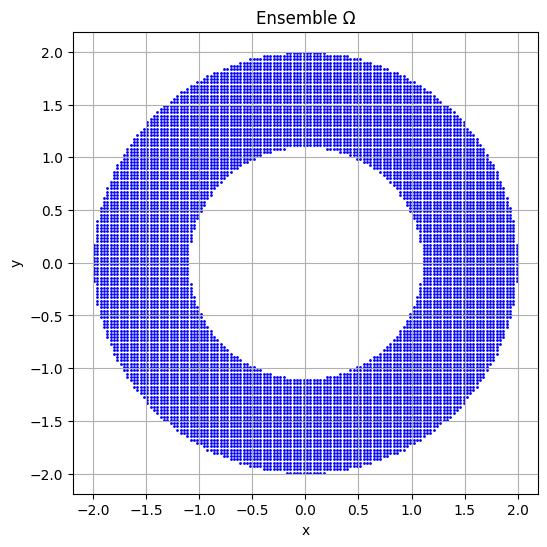

In [13]:

problem.setOmegaMesh()
problem.showOmega()


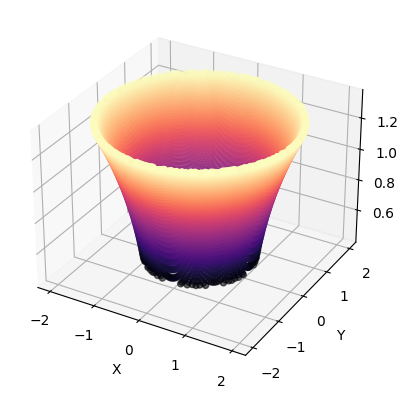

In [14]:
from mpl_toolkits.mplot3d import Axes3D

u = problem.getInterpolatedFunction()
us = problem.getSurfaceFunctionWith(u)


fig = plt.figure()

ax = fig.add_subplot(111, projection = '3d')

X, Y = problem.omega

Z = us(X, Y)


ax.scatter(X, Y, Z, c=Z, cmap="magma", marker='o')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()